Loading dataset...
Dataset loaded successfully!


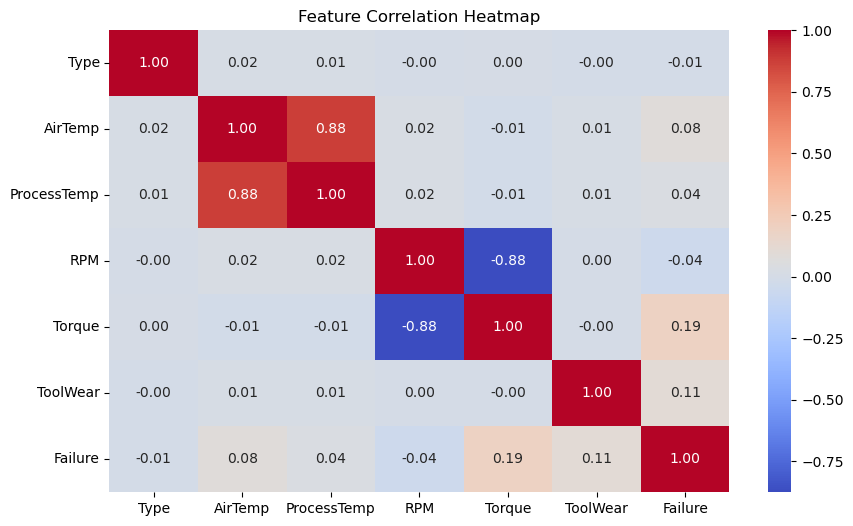

Training regression model for Tool Wear prediction...
Regression model training complete!
Mean Absolute Error for Tool Wear Prediction: 56.81183784444164

Enter values for Tool Wear Prediction:
Air Temperature (K): 1
Process Temperature (K): 1
Rotational Speed (RPM): 1
Torque (Nm): 1


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Tool Wear: 189.25 minutes

Training classification model for Machine Failure prediction...
Classification model training complete!
Classification Accuracy: 0.9835
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000


Enter values for Machine Failure Prediction:
Air Temperature (K): 1
Process Temperature (K): 1
Rotational Speed (RPM): 1
Torque (Nm): 1
Tool Wear (minutes): 1
✅ Machine is operating normally.


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
print("Loading dataset...")
df = pd.read_excel("ai4i2020.xlsx")
print("Dataset loaded successfully!")

# Drop unnecessary columns
df.drop(columns=["UDI", "Product ID", "TWF", "HDF", "PWF", "OSF", "RNF"], inplace=True)

# Rename columns for better readability
df.rename(columns={
    "Air temperature [K]": "AirTemp",
    "Process temperature [K]": "ProcessTemp",
    "Rotational speed [rpm]": "RPM",
    "Torque [Nm]": "Torque",
    "Tool wear [min]": "ToolWear",
    "Machine failure": "Failure"
}, inplace=True)

# Convert categorical columns to numerical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Regression: Predict Tool Wear
print("Training regression model for Tool Wear prediction...")
X_reg = df[["AirTemp", "ProcessTemp", "RPM", "Torque"]]
y_reg = df["ToolWear"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
print("Regression model training complete!")

print("Mean Absolute Error for Tool Wear Prediction:", mean_absolute_error(y_test_reg, reg_model.predict(X_test_reg)))

# User input for Tool Wear prediction
print("\nEnter values for Tool Wear Prediction:")
air_temp = float(input("Air Temperature (K): "))
process_temp = float(input("Process Temperature (K): "))
rpm = float(input("Rotational Speed (RPM): "))
torque = float(input("Torque (Nm): "))

user_input_reg = np.array([[air_temp, process_temp, rpm, torque]])
print("Predicted Tool Wear: {:.2f} minutes".format(reg_model.predict(user_input_reg)[0]))

# Classification: Predict Machine Failure
print("\nTraining classification model for Machine Failure prediction...")
X_clf = df[["AirTemp", "ProcessTemp", "RPM", "Torque", "ToolWear"]]
y_clf = df["Failure"]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
print("Classification model training complete!")

print("Classification Accuracy:", accuracy_score(y_test_clf, clf_model.predict(X_test_clf)))
print(classification_report(y_test_clf, clf_model.predict(X_test_clf)))

# User input for Machine Failure prediction
print("\nEnter values for Machine Failure Prediction:")
air_temp = float(input("Air Temperature (K): "))
process_temp = float(input("Process Temperature (K): "))
rpm = float(input("Rotational Speed (RPM): "))
torque = float(input("Torque (Nm): "))
tool_wear = float(input("Tool Wear (minutes): "))

user_input_clf = np.array([[air_temp, process_temp, rpm, torque, tool_wear]])
predicted_failure = clf_model.predict(user_input_clf)

if predicted_failure[0] == 1:
    print("⚠️ Warning: Machine is likely to FAIL! Take preventive measures.")
else:
    print("✅ Machine is operating normally.")
